In [44]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('AB.csv')
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


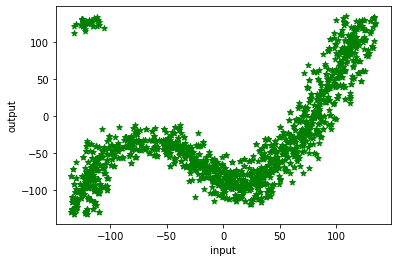

In [46]:
%matplotlib inline
plt.xlabel('input')
plt.ylabel('output')
plt.scatter(df.input,df.output,color='green',marker='*')

In [47]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [48]:
df=df.fillna(0)

In [49]:
df.head(10)

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
5,-134.366669,-116.000000
6,-115.563739,-126.267621
7,-132.080161,-132.032206
8,-133.366669,-114.000000
9,-119.524112,-94.419855


In [50]:
x = df.iloc[:, 0].values.reshape(-1, 1)
y = df.iloc[:, 1].values

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [52]:
x_train.shape,x_test.shape

((1357, 1), (340, 1))

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [54]:
y_pred = regressor.predict(x_test)

In [55]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2622.9078723230596


In [56]:
#Performing feature engineeringby building the linear regression model
from sklearn.preprocessing import PolynomialFeatures
df["x_squared"] = df["input"]**2
df["x_cubed"] = df["input"]**3

In [57]:
X = df.iloc[:, [0, -2, -1]].values
Y = df.iloc[:, 1].values 

In [58]:
regressor = LinearRegression()
regressor.fit(X, Y)

LinearRegression()

In [59]:
Y_pred = regressor.predict(X)

In [60]:
mse = mean_squared_error(Y, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1493.18322130028


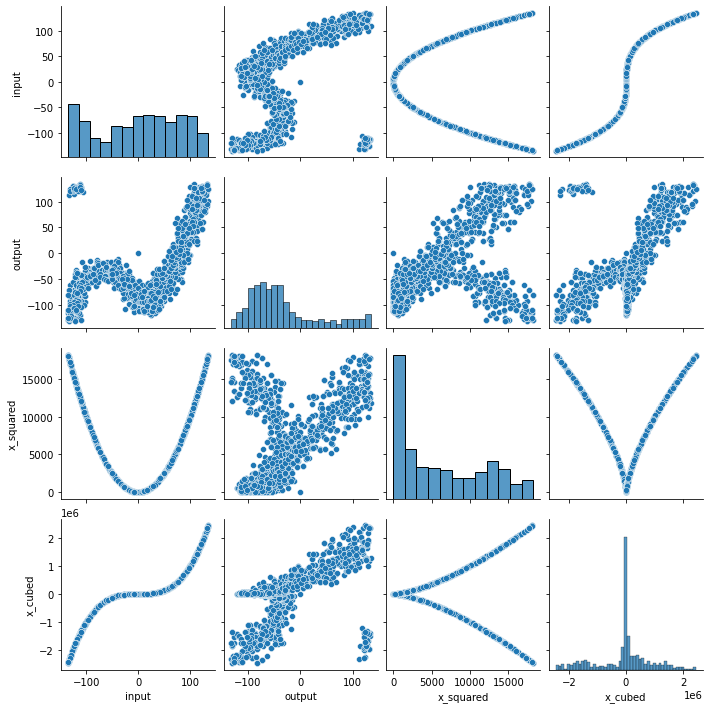

In [62]:
import seaborn as sns
sns.pairplot(df)
plt.show()